<a href="https://colab.research.google.com/github/IslamNiloy/Performance-Evaluation-of-Quantum-Fourier-Transform-on-IBM-Quantum-Device-and-Factoring-from-Period-/blob/main/Project_work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#installation 

In [ ]:
!pip install qiskit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install pylatexenc

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install ignis 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install qiskit.ignis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from qiskit import*

from qiskit.tools.visualization import plot_state_qsphere
from qiskit.visualization import plot_histogram,plot_bloch_multivector,array_to_latex

In [ ]:
import numpy as np
from numpy import pi
# importing Qiskit
from qiskit import QuantumCircuit, transpile, assemble, Aer, IBMQ
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor
from qiskit.visualization import plot_histogram, plot_bloch_multivector,array_to_latex

#Using Qiskit

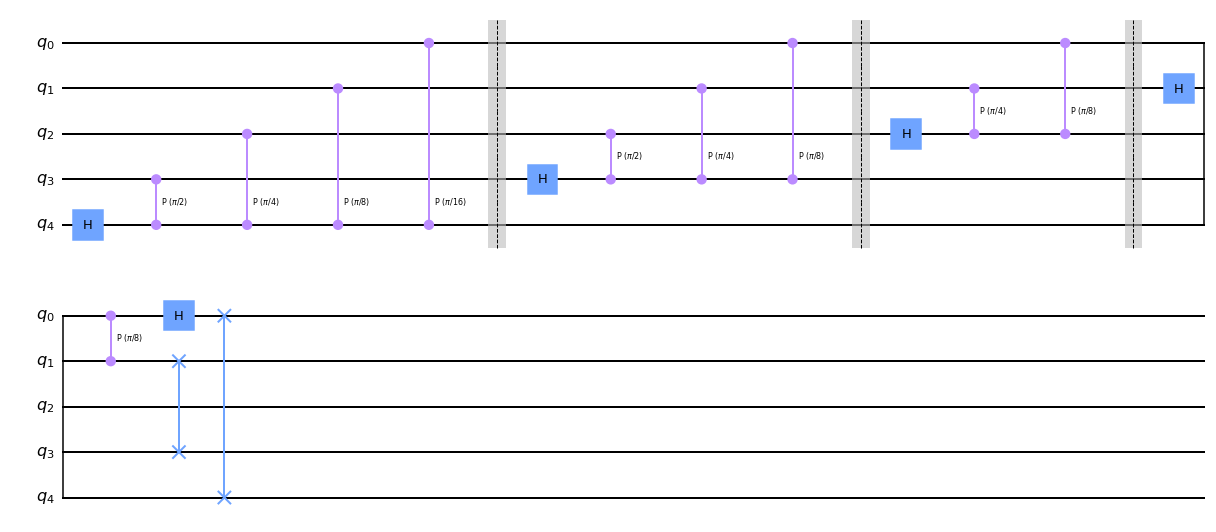

In [ ]:
qc = QuantumCircuit(5)



qc.h(4)
qc.cp(pi/2, 3, 4) # CROT from qubit 1 to qubit 4
qc.cp(pi/4, 2, 4)
qc.cp(pi/8, 1, 4)
qc.cp(pi/16, 0, 4)



qc.barrier()



qc.h(3)
qc.cp(pi/2, 2, 3) # CROT from qubit 1 to qubit 4
qc.cp(pi/4, 1, 3)
qc.cp(pi/8, 0, 3)



qc.barrier()


qc.h(2)
qc.cp(pi/4, 1, 2)
qc.cp(pi/8, 0, 2)



qc.barrier()


qc.h(1)
qc.cp(pi/8, 0, 1)


qc.h(0)

qc.swap(0,4)
qc.swap(1,3)


qc.draw(output='mpl')



In [ ]:
def qft_rotations(circuit, n):
    if n == 0: # Exit function if circuit is empty
        return circuit
    n -= 1 # Indexes start from 0
    circuit.h(n) # Apply the H-gate to the most significant qubit
    for qubit in range(n):
        # For each less significant qubit, we need to do a
        # smaller-angled controlled rotation: 
        circuit.cp(pi/2**(n-qubit), qubit, n)

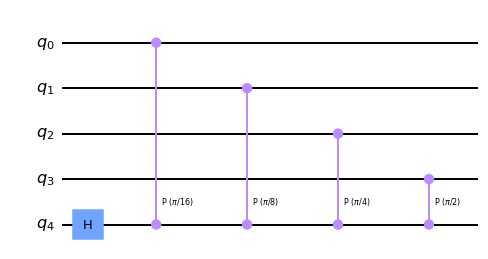

In [ ]:
qc = QuantumCircuit(5)
qft_rotations(qc,5)
qc.draw(output='mpl')

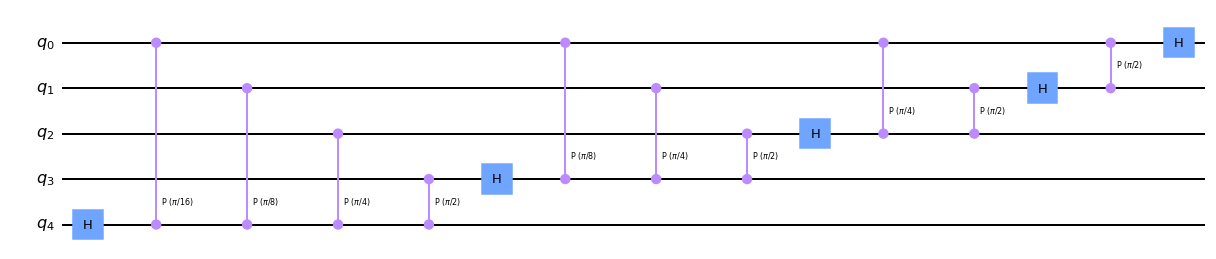

In [ ]:
def qft_rotations(circuit, n):
    """Performs qft on the first n qubits in circuit (without swaps)"""
    if n == 0:
        return circuit
    n -= 1
    circuit.h(n)
    for qubit in range(n):
        circuit.cp(pi/2**(n-qubit), qubit, n)
    # At the end of our function, we call the same function again on
    # the next qubits (we reduced n by one earlier in the function)
    qft_rotations(circuit, n)

# Let's see how it looks:
qc = QuantumCircuit(5)
qft_rotations(qc,5)
qc.draw(output='mpl')

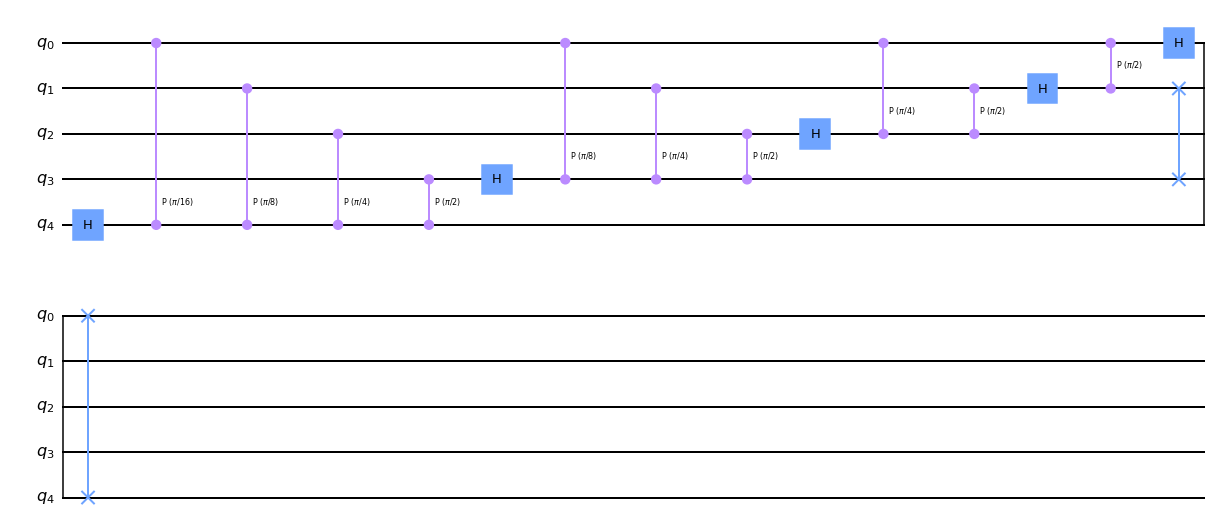

In [ ]:
def swap_registers(circuit, n):
    for qubit in range(n//2):
        circuit.swap(qubit, n-qubit-1)
    return circuit

def qft(circuit, n):
    """QFT on the first n qubits in circuit"""
    qft_rotations(circuit, n)
    swap_registers(circuit, n)
    return circuit

# Let's see how it looks:
qc = QuantumCircuit(5)
qft(qc,5)
qc.draw(output="mpl")

In [ ]:
bin(31)


'0b11111'

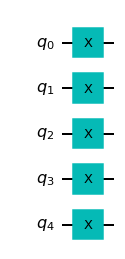

In [ ]:
# Create the circuit
qc = QuantumCircuit(5)

# Encode the state 31
qc.x(0)
qc.x(1)
qc.x(2)
qc.x(3)
qc.x(4)
qc.draw(output='mpl')

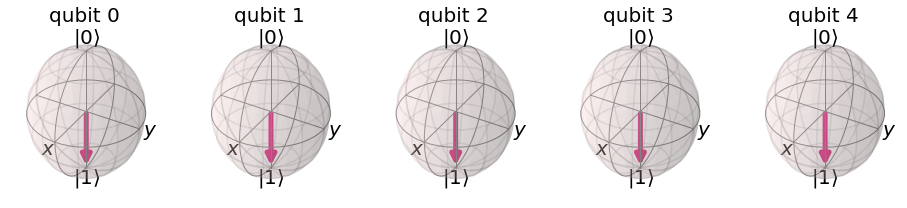

In [ ]:
sim = Aer.get_backend("aer_simulator")
qc_init = qc.copy()
qc_init.save_statevector()
statevector = sim.run(qc_init).result().get_statevector()
plot_bloch_multivector(statevector)

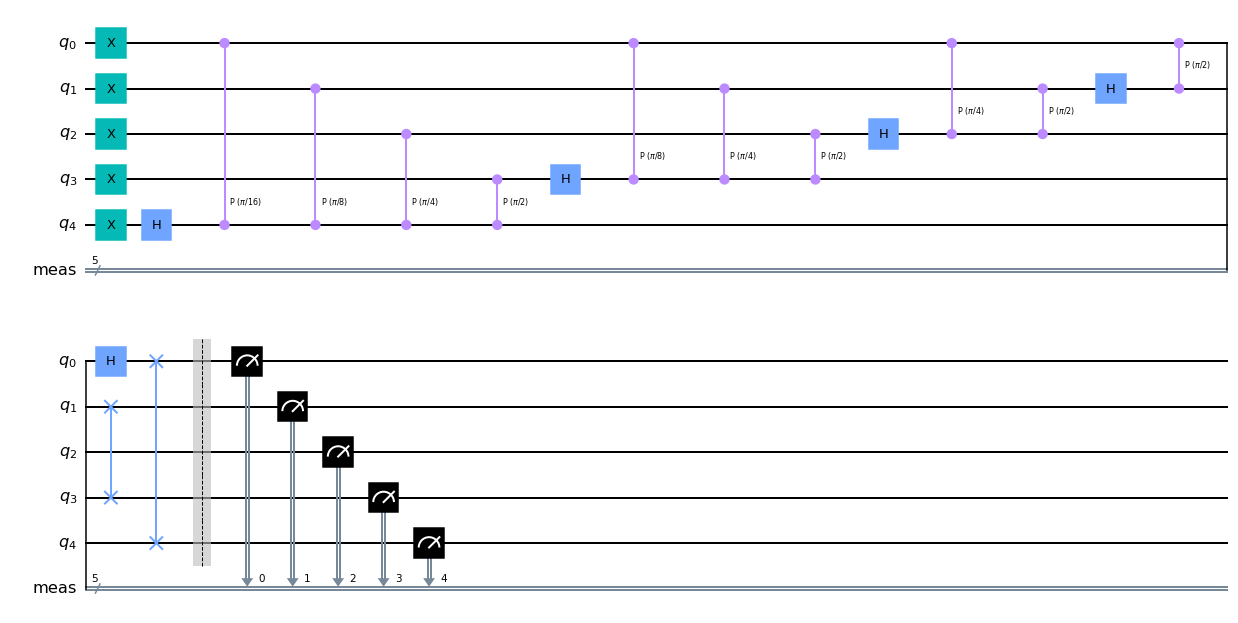

In [ ]:
qft(qc,5)
qc.measure_all()
qc.draw(output='mpl')

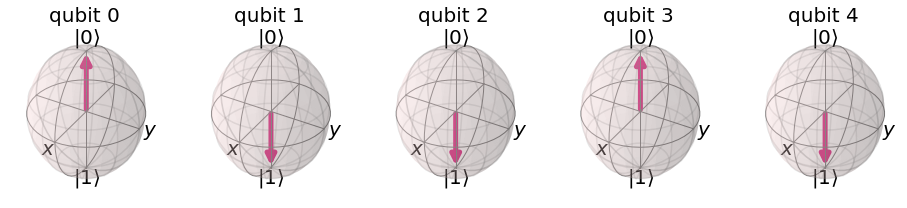

In [ ]:
qc.save_statevector()
statevector = sim.run(qc).result().get_statevector()
plot_bloch_multivector(statevector)


#Running QFT on a Real Quantum Device 
#Using 5 Qubits

In [ ]:
def inverse_qft(circuit, n):
    """Does the inverse QFT on the first n qubits in circuit"""
    # First we create a QFT circuit of the correct size:
    qft_circ = qft(QuantumCircuit(n), n)
    # Then we take the inverse of this circuit
    invqft_circ = qft_circ.inverse()
    # And add it to the first n qubits in our existing circuit
    circuit.append(invqft_circ, circuit.qubits[:n])
    return circuit.decompose() # .decompose() allows us to see the individual gates

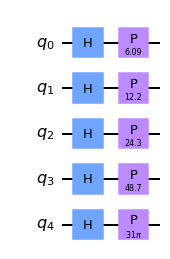

In [ ]:
nqubits = 5
number = 31
qc = QuantumCircuit(nqubits)
for qubit in range(nqubits):
    qc.h(qubit)
qc.p(number*pi/16,0)
qc.p(number*pi/8,1)
qc.p(number*pi/4,2)
qc.p(number*pi/2,3)
qc.p(number*pi,4)
qc.draw(output='mpl')

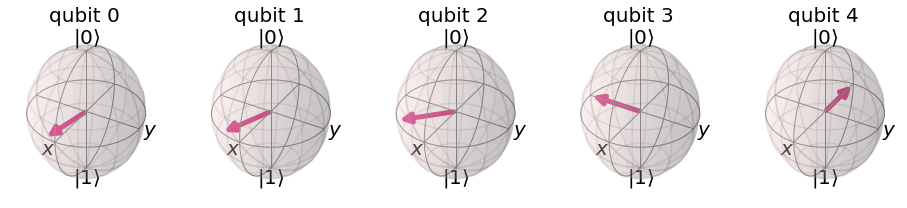

In [ ]:
qc_init = qc.copy()
qc_init.save_statevector()
sim = Aer.get_backend("aer_simulator")
statevector = sim.run(qc_init).result().get_statevector()
plot_bloch_multivector(statevector)

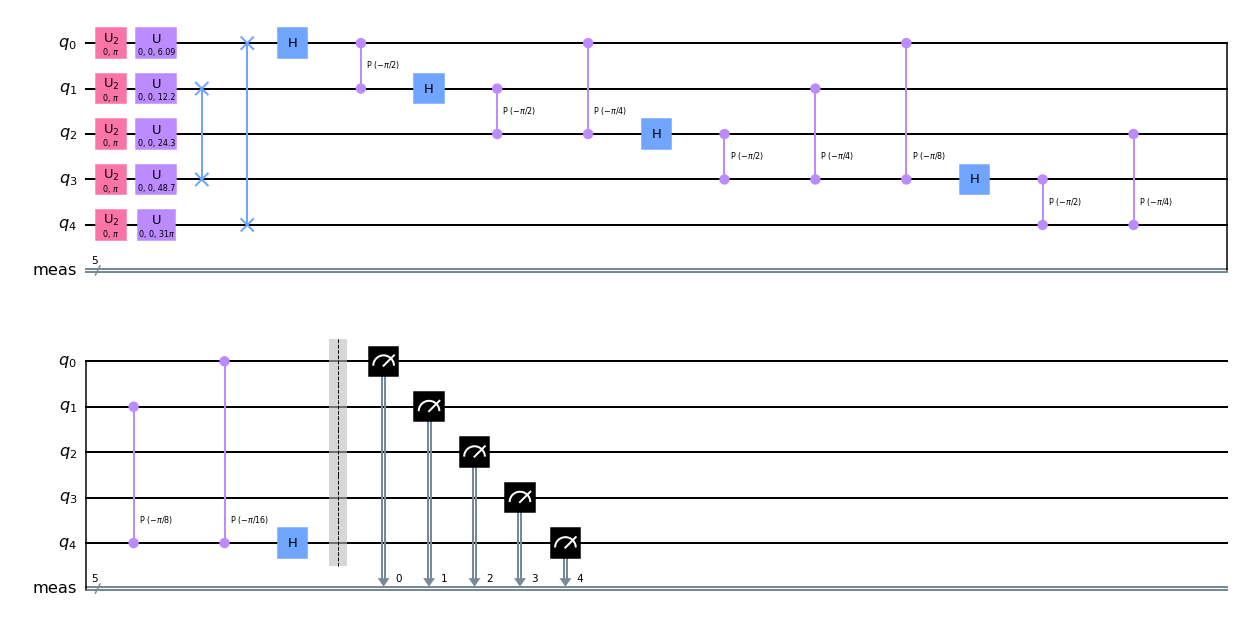

In [ ]:
qc = inverse_qft(qc, nqubits)
qc.measure_all()
qc.draw(output='mpl')

# For Checking in simulator

In [ ]:
simulator = Aer.get_backend('aer_simulator')
qc.save_statevector()
qobj = assemble(qc)
job =simulator.run(qobj)
job_monitor(job)
result = job.result()
#state = result.get_statevector()
counts=result.get_counts()

#print(result)

Job Status: job has successfully run


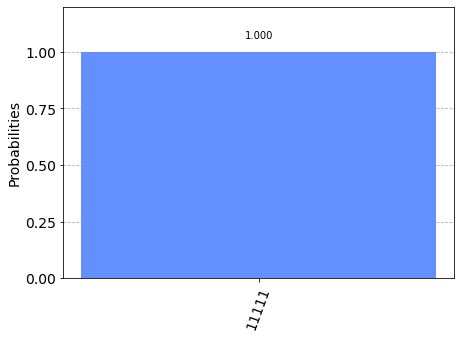

In [ ]:
plot_histogram(counts)

#Continue 

ibmq_quito (qubits 5)

configrc.store_credentials:WARNING:2022-08-21 20:27:36,620: Credentials already present. Set overwrite=True to overwrite.
ibmqfactory.load_account:WARNING:2022-08-21 20:27:36,782: Credentials are already in use. The existing account in the session will be replaced.


Job Status: job has successfully run


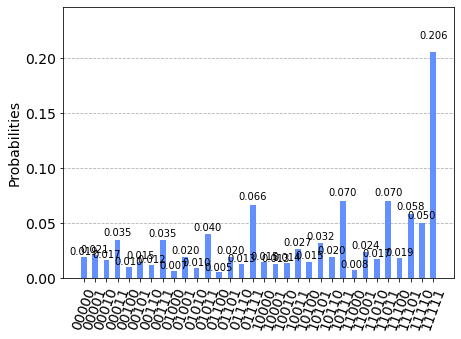

In [ ]:
from qiskit import IBMQ
IBMQ.save_account('fa482d6e25a0c85f055cae3521c0a70c6f06ac011474413941d6ec7ac761e3239f8ea076c5d83d424f43bba0922a557999a41ee8cc9834522804aa9271238fbd')
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
qcom = least_busy(provider.backends('ibmq_quito'))

shots = 2048
transpiled_qc = transpile(qc,qcom, optimization_level=3)
job = qcom.run(transpiled_qc, shots=shots)
job_monitor(job)

counts = job.result().get_counts()
plot_histogram(counts)


#Mitigating Noise

In [ ]:
from qiskit.ignis.mitigation.measurement import (complete_meas_cal,CompleteMeasFitter)

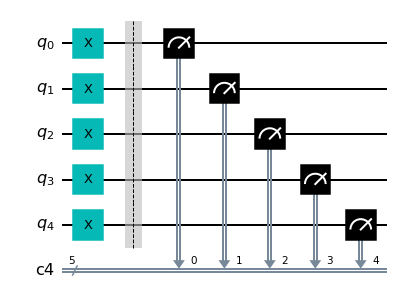

In [ ]:
cal_qc,state_labels= complete_meas_cal(qr = qc.qregs [0], circlabel ='measerrormitigationcal')
cal_qc[31].draw(output='mpl')

In [ ]:
len(cal_qc)

32

In [ ]:
cal_job=execute(cal_qc, backend=qcom,shots=1024,optimization_level=0,)
print(cal_job.job_id())
job_monitor(cal_job)
cal_result=cal_job.result()

6302aab30f8753789cb3a6cf
Job Status: job has successfully run


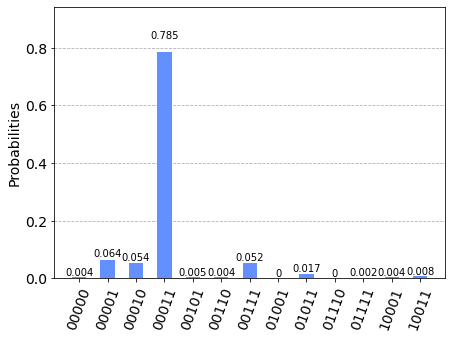

In [ ]:
plot_histogram(cal_result.get_counts(cal_qc[3]))

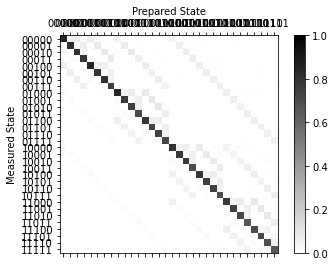

In [ ]:
meas_fitter = CompleteMeasFitter(cal_result,state_labels)
meas_fitter.plot_calibration()

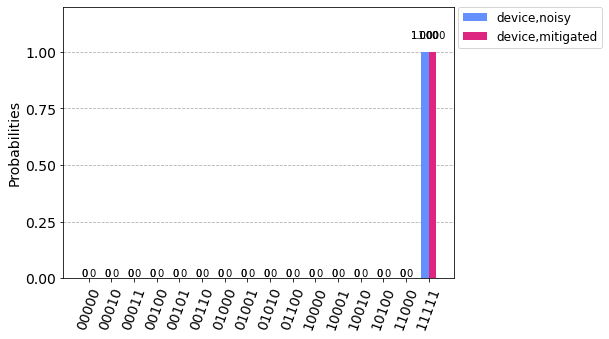

In [ ]:
meas_filter=meas_fitter.filter
mitigated_result=meas_filter.apply(result)
device_counts=result.get_counts(qc) 
mitigated_counts= mitigated_result.get_counts(qc)
plot_histogram([device_counts,mitigated_counts],legend=['device,noisy','device,mitigated'])

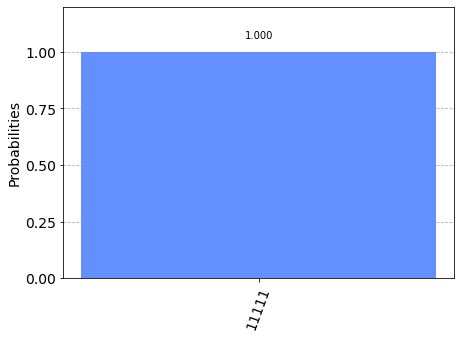

In [ ]:
plot_histogram(execute(qc,backend=simulator,shots=1024).result().get_counts(qc))

In [ ]:
device_count2=execute(qc,backend=qcom,shots=1024).result().get_counts(qc)

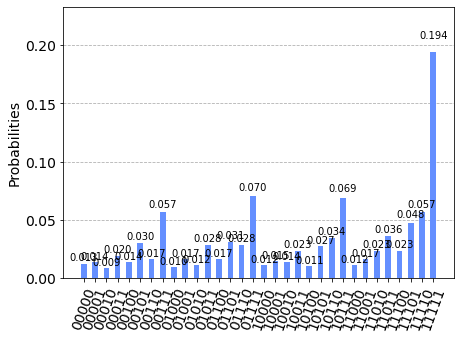

In [ ]:
plot_histogram(device_count2)

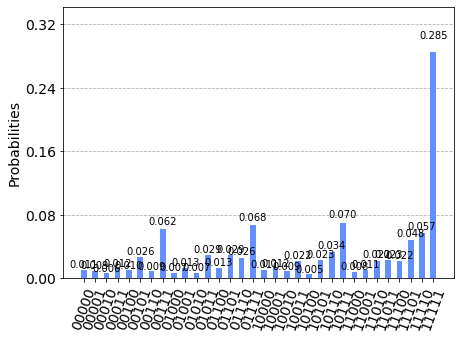

In [ ]:
device_mitigated_count2=meas_filter.apply(device_count2)
plot_histogram(device_mitigated_count2)

#Continue

ibm_nairobi (Qubits 7)




configrc.store_credentials:WARNING:2022-08-15 21:26:10,945: Credentials already present. Set overwrite=True to overwrite.
ibmqfactory.load_account:WARNING:2022-08-15 21:26:11,217: Credentials are already in use. The existing account in the session will be replaced.


Job Status: job has successfully run


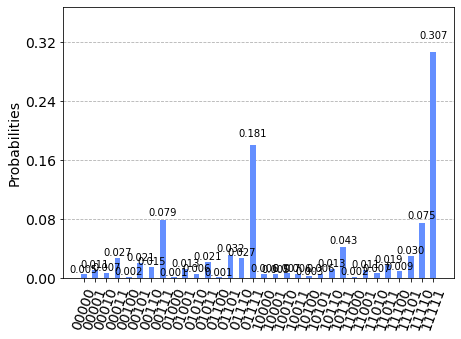

In [ ]:
from qiskit import IBMQ
IBMQ.save_account('fa482d6e25a0c85f055cae3521c0a70c6f06ac011474413941d6ec7ac761e3239f8ea076c5d83d424f43bba0922a557999a41ee8cc9834522804aa9271238fbd')
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
backend = least_busy(provider.backends('ibm_nairobi'))

shots = 2048
transpiled_qc = transpile(qc, backend, optimization_level=3)
job = backend.run(transpiled_qc, shots=shots)
job_monitor(job)

counts = job.result().get_counts()
plot_histogram(counts)

ibm_oslo (qubits 7)

configrc.store_credentials:WARNING:2022-08-16 07:59:49,342: Credentials already present. Set overwrite=True to overwrite.
ibmqfactory.load_account:WARNING:2022-08-16 07:59:49,727: Credentials are already in use. The existing account in the session will be replaced.


Job Status: job has successfully run


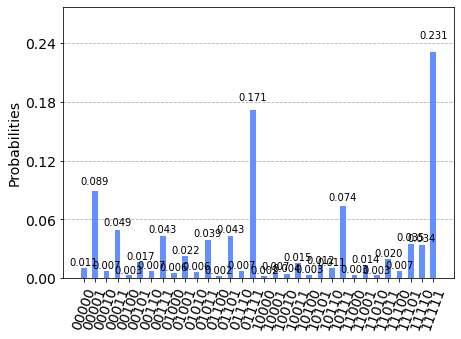

In [ ]:
from qiskit import IBMQ
IBMQ.save_account('fa482d6e25a0c85f055cae3521c0a70c6f06ac011474413941d6ec7ac761e3239f8ea076c5d83d424f43bba0922a557999a41ee8cc9834522804aa9271238fbd')
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
backend = least_busy(provider.backends('ibm_oslo'))

shots = 2048
transpiled_qc = transpile(qc, backend, optimization_level=3)
job = backend.run(transpiled_qc, shots=shots)
job_monitor(job)

counts = job.result().get_counts()
plot_histogram(counts)

ibmq_manila(qubits 5)

Job Status: job has successfully run


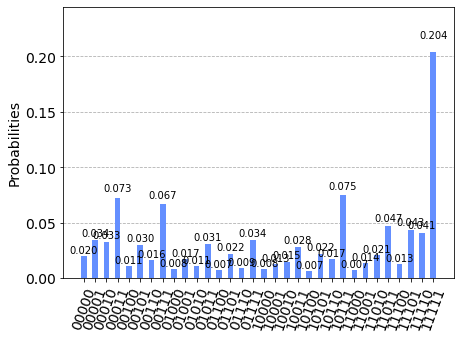

In [ ]:
from qiskit import IBMQ
IBMQ.save_account('fa482d6e25a0c85f055cae3521c0a70c6f06ac011474413941d6ec7ac761e3239f8ea076c5d83d424f43bba0922a557999a41ee8cc9834522804aa9271238fbd')
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
backend = least_busy(provider.backends('ibmq_manila'))

shots = 2048
transpiled_qc = transpile(qc, backend, optimization_level=3)
job = backend.run(transpiled_qc, shots=shots)
job_monitor(job)

counts = job.result().get_counts()
plot_histogram(counts)

ibmq_belem (qubits 5)

configrc.store_credentials:WARNING:2022-08-16 07:54:45,389: Credentials already present. Set overwrite=True to overwrite.
ibmqfactory.load_account:WARNING:2022-08-16 07:54:45,671: Credentials are already in use. The existing account in the session will be replaced.


Job Status: job has successfully run


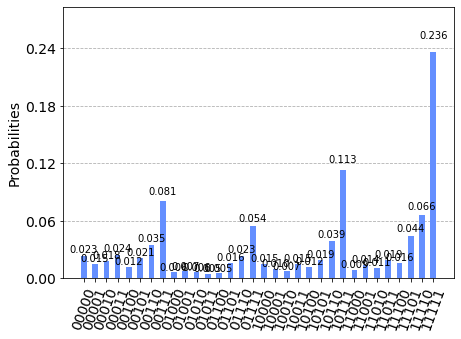

In [ ]:
from qiskit import IBMQ
IBMQ.save_account('fa482d6e25a0c85f055cae3521c0a70c6f06ac011474413941d6ec7ac761e3239f8ea076c5d83d424f43bba0922a557999a41ee8cc9834522804aa9271238fbd')
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
backend = least_busy(provider.backends('ibmq_belem'))

shots = 2048
transpiled_qc = transpile(qc, backend, optimization_level=3)
job = backend.run(transpiled_qc, shots=shots)
job_monitor(job)

counts = job.result().get_counts()
plot_histogram(counts)

ibmq_lima (qubits 5)

configrc.store_credentials:WARNING:2022-08-16 07:58:37,175: Credentials already present. Set overwrite=True to overwrite.
ibmqfactory.load_account:WARNING:2022-08-16 07:58:37,437: Credentials are already in use. The existing account in the session will be replaced.


Job Status: job has successfully run


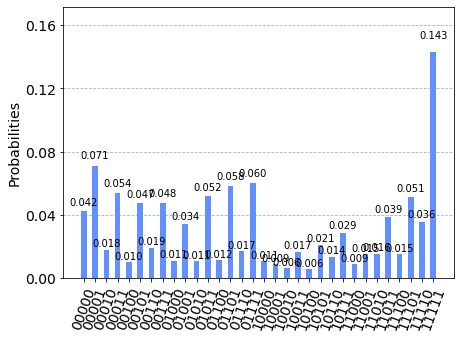

In [ ]:
from qiskit import IBMQ
IBMQ.save_account('fa482d6e25a0c85f055cae3521c0a70c6f06ac011474413941d6ec7ac761e3239f8ea076c5d83d424f43bba0922a557999a41ee8cc9834522804aa9271238fbd')
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
backend = least_busy(provider.backends('ibmq_lima'))

shots = 2048
transpiled_qc = transpile(qc, backend, optimization_level=3)
job = backend.run(transpiled_qc, shots=shots)
job_monitor(job)

counts = job.result().get_counts()
plot_histogram(counts)

#7 Qubit QFT


In [ ]:
def inverse_qft(circuit, n):
    """Does the inverse QFT on the first n qubits in circuit"""
    # First we create a QFT circuit of the correct size:
    qft_circ = qft(QuantumCircuit(n), n)
    # Then we take the inverse of this circuit
    invqft_circ = qft_circ.inverse()
    # And add it to the first n qubits in our existing circuit
    circuit.append(invqft_circ, circuit.qubits[:n])
    return circuit.decompose() # .decompose() allows us to see the individual gates

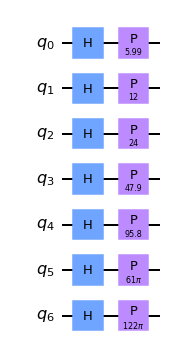

In [ ]:
nqubits = 7
number = 122
qc = QuantumCircuit(nqubits)
for qubit in range(nqubits):
    qc.h(qubit)
qc.p(number*pi/64,0)
qc.p(number*pi/32,1)
qc.p(number*pi/16,2)
qc.p(number*pi/8,3)
qc.p(number*pi/4,4)
qc.p(number*pi/2,5)
qc.p(number*pi,6)
qc.draw(output='mpl')

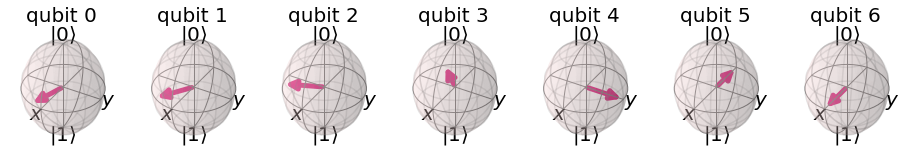

In [ ]:
qc_init = qc.copy()
qc_init.save_statevector()
sim = Aer.get_backend("aer_simulator")
statevector = sim.run(qc_init).result().get_statevector()
plot_bloch_multivector(statevector)


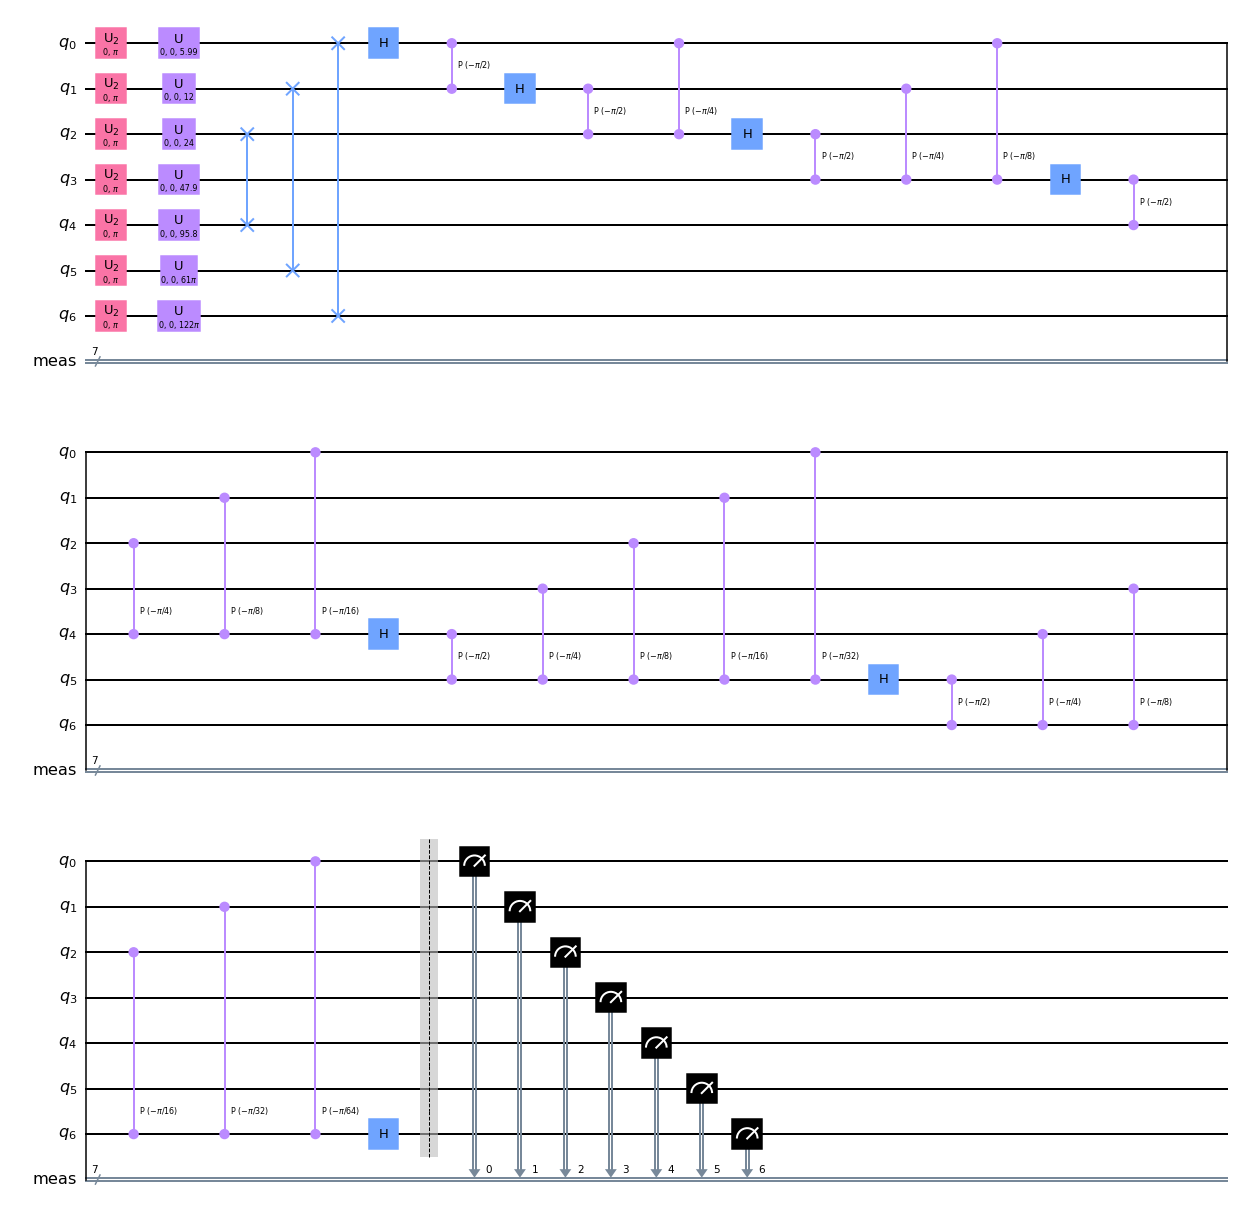

In [ ]:
qc = inverse_qft(qc, nqubits)
qc.measure_all()
qc.draw(output='mpl')

#Result in simulator

Job Status: job has successfully run


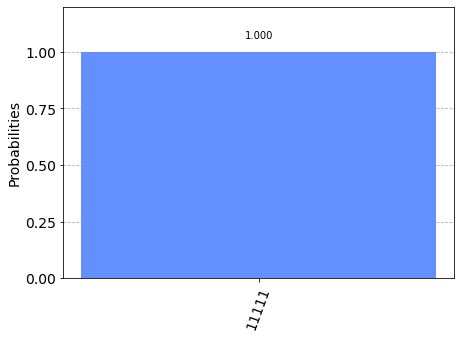

In [ ]:
simulator = Aer.get_backend('aer_simulator')
qc.save_statevector()
qobj = assemble(qc)
job =simulator.run(qobj)
job_monitor(job)
result = job.result()
#state = result.get_statevector()
counts=result.get_counts()
plot_histogram(counts)

In [ ]:
bin(122)

'0b1111010'

#continue 

ibm_nairobi (Qubits 7)

In [ ]:
from qiskit import IBMQ
IBMQ.save_account('fa482d6e25a0c85f055cae3521c0a70c6f06ac011474413941d6ec7ac761e3239f8ea076c5d83d424f43bba0922a557999a41ee8cc9834522804aa9271238fbd')
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
qcomp = least_busy(provider.backends('ibm_nairobi'))

shots = 2048
transpiled_qc = transpile(qc, qcomp, optimization_level=3)
job = qcomp.run(transpiled_qc, shots=shots)
job_monitor(job)
result=job.result()

configrc.store_credentials:WARNING:2022-08-22 02:28:01,029: Credentials already present. Set overwrite=True to overwrite.
ibmqfactory.load_account:WARNING:2022-08-22 02:28:01,172: Credentials are already in use. The existing account in the session will be replaced.


Job Status: job has successfully run


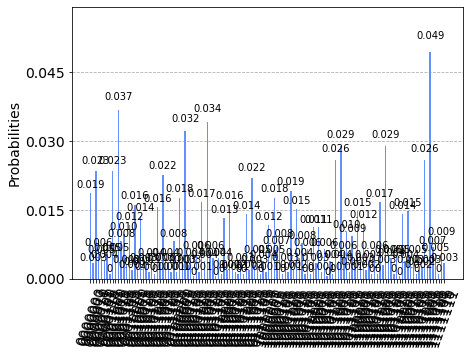

In [ ]:
counts =result.get_counts()
plot_histogram(counts)

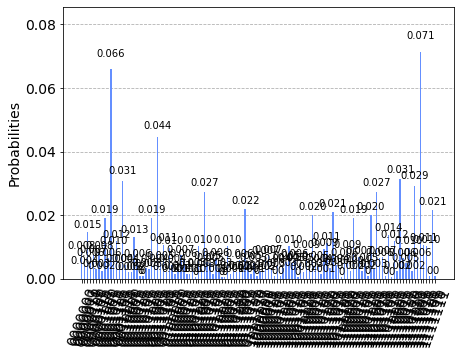

In [ ]:
counts =result.get_counts()
plot_histogram(counts)

In [ ]:
from qiskit.ignis.mitigation.measurement import (complete_meas_cal,CompleteMeasFitter)

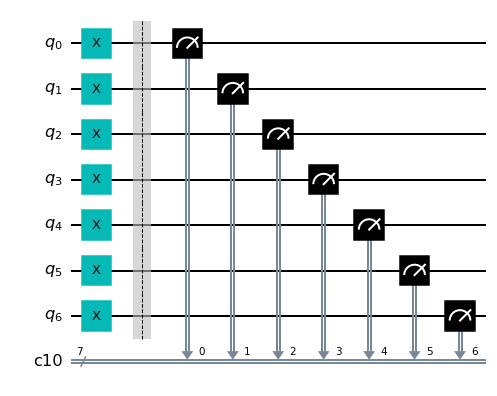

In [ ]:
cal_qc,state_labels= complete_meas_cal(qr = qc.qregs [0], circlabel ='measerrormitigationcal')
cal_qc[127].draw(output='mpl')

In [ ]:
len(cal_qc)

128

In [ ]:
cal_job=execute(cal_qc, backend=qcomp,shots=2048,optimization_level=0,)
print(cal_job.job_id())
job_monitor(cal_job)
cal_result=cal_job.result()

In [ ]:
plot_histogram(cal_result.get_counts(cal_qc[62]))

In [ ]:
meas_fitter = CompleteMeasFitter(cal_result,state_labels)
meas_fitter.plot_calibration()

In [ ]:
meas_filter=meas_fitter.filter
mitigated_result=meas_filter.apply(result)
device_counts=result.get_counts(qc) 
mitigated_counts= mitigated_result.get_counts(qc)
plot_histogram([device_counts,mitigated_counts],legend=['device,noisy','device,mitigated'])

In [ ]:
device_count2=execute(qc,backend=qcom,shots=2048).result().get_counts(qc)

In [ ]:
device_mitigated_count2=meas_filter.apply(device_count2)
plot_histogram(device_mitigated_count2)

ibm_oslo (qubits 7)

In [ ]:
from qiskit import IBMQ
IBMQ.save_account('fa482d6e25a0c85f055cae3521c0a70c6f06ac011474413941d6ec7ac761e3239f8ea076c5d83d424f43bba0922a557999a41ee8cc9834522804aa9271238fbd')
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
qcomp = least_busy(provider.backends('ibm_oslo'))

shots = 2048
transpiled_qc = transpile(qc, qcomp, optimization_level=3)
job = qcomp.run(transpiled_qc, shots=shots)
job_monitor(job)
result=job.result()



configrc.store_credentials:WARNING:2022-08-22 02:14:47,748: Credentials already present. Set overwrite=True to overwrite.
ibmqfactory.load_account:WARNING:2022-08-22 02:14:47,898: Credentials are already in use. The existing account in the session will be replaced.


Job Status: job has successfully run


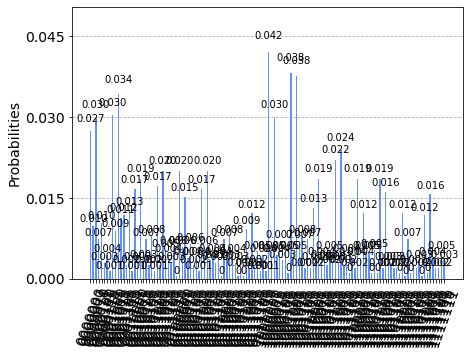

In [ ]:
counts =result.get_counts()
plot_histogram(counts)